In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('modified.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 6 columns):
Quality_assesment     1151 non-null int64
Pre_screening         1151 non-null int64
Euclidean_distance    1151 non-null float64
Diameter_disc         1151 non-null float64
Binary_result         1151 non-null int64
Class_label           1151 non-null int64
dtypes: float64(2), int64(4)
memory usage: 54.0 KB


In [5]:
df.head()

,Quality_assesment,Pre_screening,Euclidean_distance,Diameter_disc,Binary_result,Class_label
0,1,1,0.486903,0.100025,1,0
1,1,1,0.520908,0.144414,0,0
2,1,1,0.530904,0.128548,0,1
3,1,1,0.483284,0.114790,0,0
4,1,1,0.475935,0.123572,0,1


In [6]:
df.describe()

,Quality_assesment,Pre_screening,Euclidean_distance,Diameter_disc,Binary_result,Class_label
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,0.996525,0.918332,0.523212,0.108431,0.336229,0.530843
std,0.058874,0.273977,0.028055,0.017945,0.472624,0.499265
min,0.000000,0.000000,0.367762,0.057906,0.000000,0.000000
25%,1.000000,1.000000,0.502855,0.095799,0.000000,0.000000
50%,1.000000,1.000000,0.523308,0.106623,0.000000,1.000000
75%,1.000000,1.000000,0.543670,0.119591,1.000000,1.000000
max,1.000000,1.000000,0.592217,0.219199,1.000000,1.000000


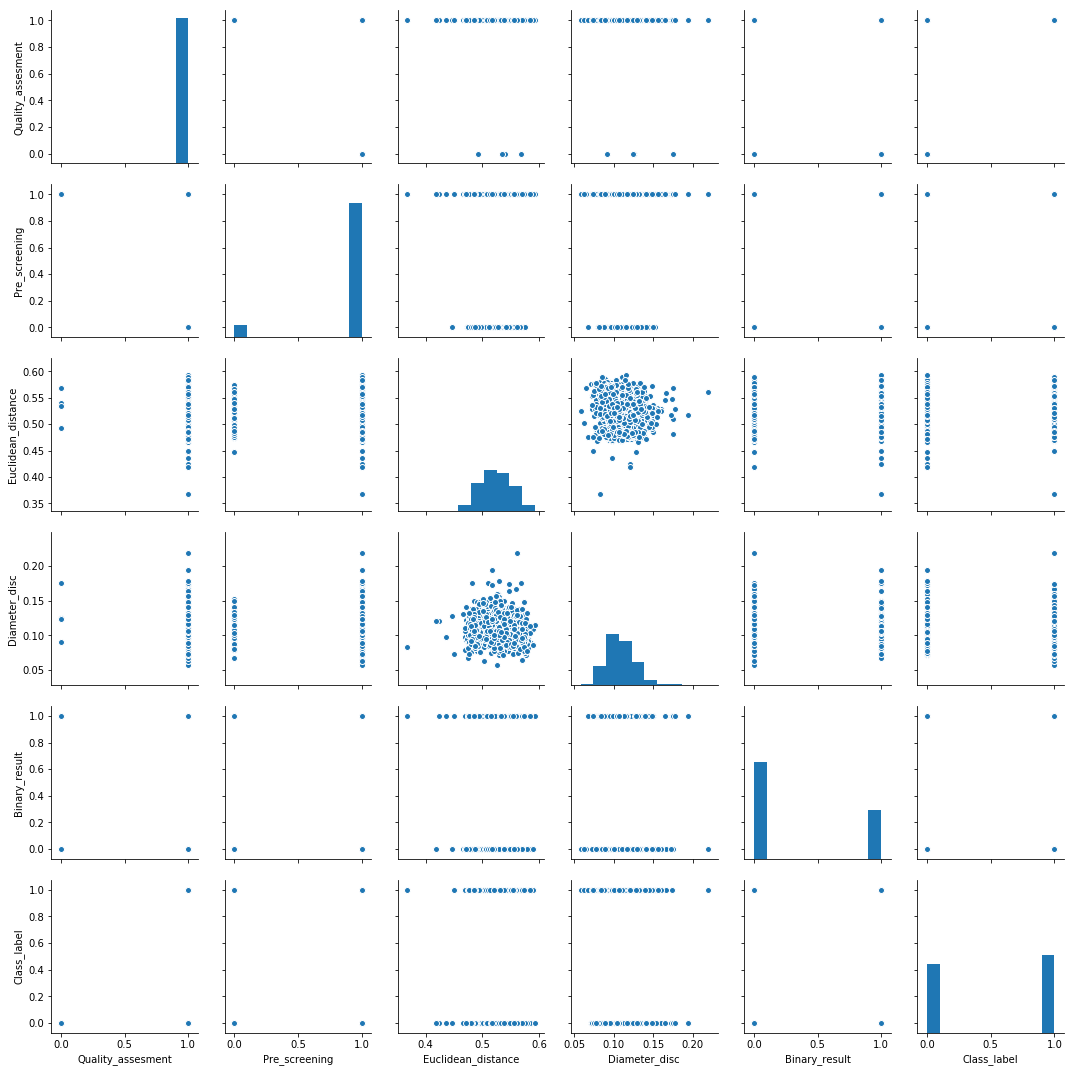

In [7]:
sns.pairplot(df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 6 columns):
Quality_assesment     1151 non-null int64
Pre_screening         1151 non-null int64
Euclidean_distance    1151 non-null float64
Diameter_disc         1151 non-null float64
Binary_result         1151 non-null int64
Class_label           1151 non-null int64
dtypes: float64(2), int64(4)
memory usage: 54.0 KB


In [9]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop('Class_label',axis=1)
y = df['Class_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dtree = DecisionTreeClassifier()

In [15]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
predictions = dtree.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.37      0.42      0.39       140
          1       0.56      0.51      0.54       206

avg / total       0.49      0.47      0.48       346



In [19]:
print(confusion_matrix(y_test,predictions))

[[ 59  81]
 [101 105]]


In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rfc = RandomForestClassifier(n_estimators=600)

In [22]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
predictions = rfc.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.38      0.43      0.40       140
          1       0.57      0.51      0.54       206

avg / total       0.49      0.48      0.48       346



In [26]:
print(confusion_matrix(y_test,predictions))

[[ 60  80]
 [100 106]]
